In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle/

In [4]:
!cp /content/drive/MyDrive/Kaggle_API_Credentials/kaggle.json ~/.kaggle/kaggle.json

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download jtiptj/chest-xray-pneumoniacovid19tuberculosis

100% 1.74G/1.74G [00:13<00:00, 176MB/s]
100% 1.74G/1.74G [00:13<00:00, 138MB/s]


In [7]:
! unzip chest-xray-pneumoniacovid19tuberculosis

Streaming output truncated to the last 5000 lines.
  inflating: train/NORMAL/NORMAL2-IM-0843-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0845-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0846-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0847-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0848-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0849-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0851-0001-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0851-0001-0002.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0851-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0852-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0853-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0854-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0855-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0856-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0857-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0858-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0859-0001.jpeg  
  inflating: train/NO

In [8]:
# Import packages
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
#Defining path directory
train_dir=r"/content/train"
test_dir=r"/content/test"
val_dir=r"/content/val"
# Use ImageDataGenerator to rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(224, 224),
                                                    color_mode="grayscale",
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)

valid_generator = valid_datagen.flow_from_directory(val_dir, 
                                                    target_size=(224, 224),
                                                    color_mode="grayscale",
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)


test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  color_mode="grayscale",
                                                  batch_size=1,
                                                  class_mode=None,
                                                  shuffle=False,
                                                  seed=42)


Found 6326 images belonging to 4 classes.
Found 38 images belonging to 4 classes.
Found 771 images belonging to 4 classes.


### CREATING THE MODEL

In [10]:
model= Sequential()

model.add(Conv2D(filters=128,strides= 1, kernel_size = (5,5), activation='relu', input_shape=(224,224,1,)))
model.add(MaxPool2D(3,3))
model.add(Conv2D(filters=64,kernel_size = (5,5),activation='relu'))
model.add(MaxPool2D(3,3))

model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 128)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 30)        17310     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 30)       0

TRAINING THE MODEL

In [12]:
# Hyperparameters
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
# Stop the training when there is no improvement after 3 epochs trainings.
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=valid_generator,verbose= 1,
          validation_steps=STEP_SIZE_VALID,
          epochs=20, callbacks=early_stop)

Epoch 1/20
197/197 [==============================] - 70s 355ms/step - loss: 0.3518 - accuracy: 0.8657 - val_loss: 0.7179 - val_accuracy: 0.7188
Epoch 2/20
197/197 [==============================] - 70s 356ms/step - loss: 0.2457 - accuracy: 0.9118 - val_loss: 0.5716 - val_accuracy: 0.8125
Epoch 3/20
197/197 [==============================] - 71s 360ms/step - loss: 0.1958 - accuracy: 0.9315 - val_loss: 0.3113 - val_accuracy: 0.8438
Epoch 4/20
197/197 [==============================] - 71s 357ms/step - loss: 0.1683 - accuracy: 0.9390 - val_loss: 0.3948 - val_accuracy: 0.8438
Epoch 5/20
197/197 [==============================] - 70s 357ms/step - loss: 0.1428 - accuracy: 0.9522 - val_loss: 0.2965 - val_accuracy: 0.8750
Epoch 6/20
197/197 [==============================] - 70s 356ms/step - loss: 0.1358 - accuracy: 0.9498 - val_loss: 0.2446 - val_accuracy: 0.9375
Epoch 7/20
197/197 [==============================] - 70s 354ms/step - loss: 0.1109 - accuracy: 0.9593 - val_loss: 0.3923 - val_ac

In [13]:
# Evaluate the model
model.evaluate(valid_generator,steps=STEP_SIZE_VALID)
# Save the model
model.save("KerasModel")

1/1 [==============================] - 0s 409ms/step - loss: 0.2113 - accuracy: 0.9688


### PREDICT WITH THE MODEL

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Predict Output
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

771/771 [==============================] - 10s 13ms/step


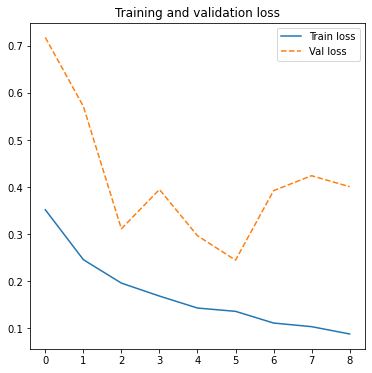

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(6,6))
plt.plot(loss, label='Train loss')
plt.plot(val_loss,'--', label='Val loss')
plt.title('Training and validation loss')
plt.legend();

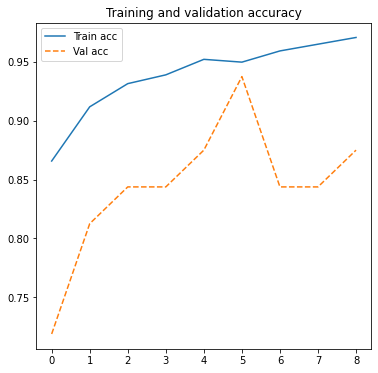

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(6,6))
plt.plot(acc, label='Train acc')
plt.plot(val_acc,'--', label='Val acc')
plt.title('Training and validation accuracy')
plt.legend();

In [17]:
current_idx = 0
count_accurate= 0
Actual = []
for i in predictions:
    string = test_generator.filenames[current_idx]
    substr = '/'
    actual = string[:string.find(substr)]
    Actual.append(actual)
    pred = predictions[current_idx]
    if actual == pred: 
        count_accurate += 1
    current_idx +=1
acc = count_accurate/771
print(f"The accuracy on predicted the test images is {round(acc*100,2)}%.")

The accuracy on predicted the test images is 80.16%.


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Actual, predictions))

               precision    recall  f1-score   support

      COVID19       0.97      0.79      0.87       106
       NORMAL       0.94      0.47      0.63       234
    PNEUMONIA       0.77      0.98      0.86       390
TURBERCULOSIS       0.61      0.98      0.75        41

     accuracy                           0.80       771
    macro avg       0.82      0.81      0.78       771
 weighted avg       0.84      0.80      0.79       771



Data Visualization

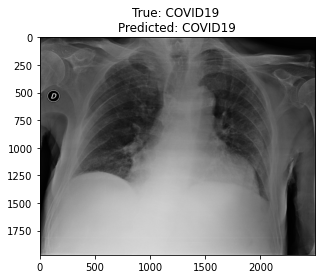

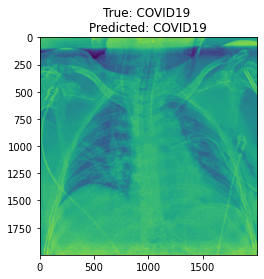

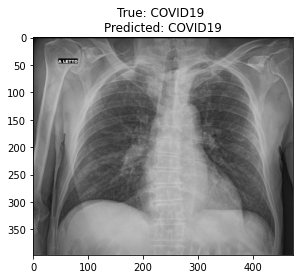

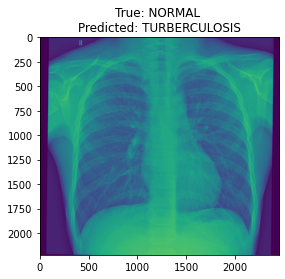

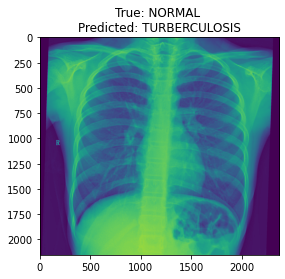

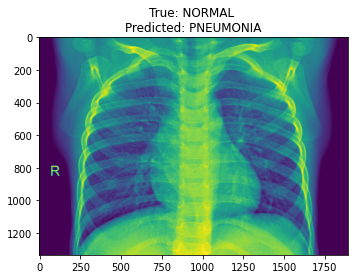

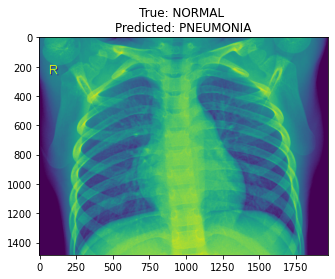

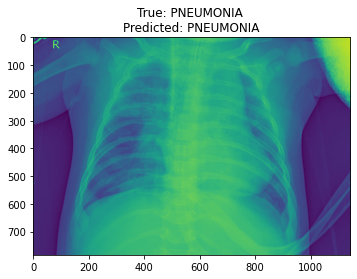

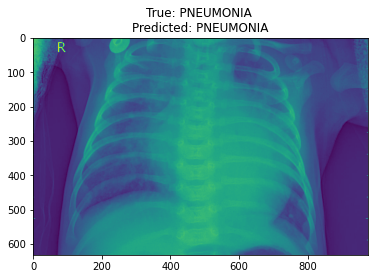

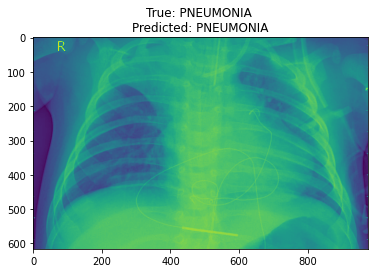

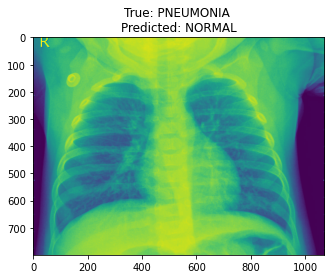

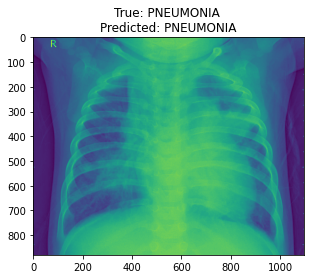

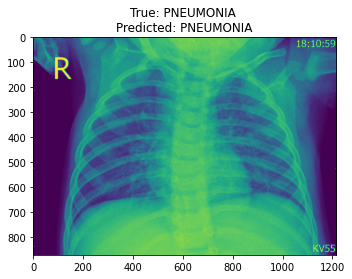

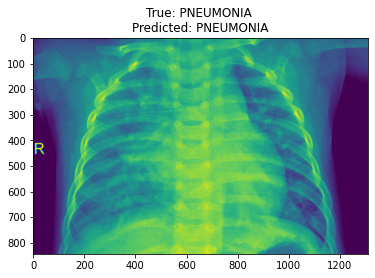

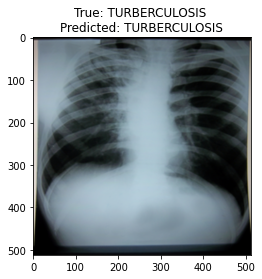

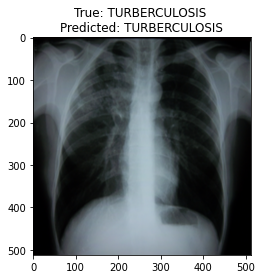

In [20]:
# Selected some images to see its predictions
current = [1,37,103,189,203,274,333,355,435,478,511,587,609,678,734,760]
for i in current: 
    plt.imshow(plt.imread('test/'+test_generator.filenames[i]))
    string = test_generator.filenames[i]
    substr = '/'
    actual = string[:string.find(substr)]
    plt.title(f"True: {actual} \nPredicted: {predictions[i]}")
    plt.show()

In [21]:
import pandas as pd

# Save results to csv file
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)